# Title: Thomas Fire Analysis: AQI and False Color Image
By Caitlin Nordheim-Maestas

Link to github repo: https://github.com/cnordheim-maestas/eds-220-hwk4-task3-Presentation-ready-repo.git

## About

Your notebook must include an about section with the following subsections: 

### Purpose
Purpose here

### Highlights of analysis. 
For example:
- Fetch vector data from an online repository
- Visualize raster data
- Time series analysis
- etc
- Dataset description
- References to datasets.

The rest of your notebook should be organized into logical subsections for the analysis/visualization you are performing. Your analysis and data wrangling should include checks to show you’ve verified your output. These are some sections your could include:
1. Importing data
2. Geographical context of data
3. Data exploration
4. Analysis
- Include subsections as necessary to guide reader through your analysis
- Include checks to see operations worked
- Checks must be short and informative: print specific attributes instead
of running df.head() or printing entire objects.
5. Final output

## 1: Importing libraries and data

In [ ]:
# Import libraries and functions
import os # accessible file paths
import numpy as np # math operations
import pandas as pd # data manipulation & analysis
import geopandas as gpd # geospatial data manipulation
from shapely.geometry import Polygon
import xarray as xr # for n-dimmensional array data
import rioxarray as rioxr # for geospatial n-dimmensional array data
from rasterio.features import rasterize # for rasterizing polygons
# plotting
import matplotlib.pyplot as plt # for plotting
import matplotlib.patches as mpatches # for pretty legends

# import AQI data
# using the pandas read_csv function
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')

# import landsat data
# using rasterio 
# use the os to get the current working directory
land_fp = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')
land = rioxr.open_rasterio(land_fp) # use this for geospatial raster data

# second dataset: fire perimeters in California during 2017
# using geopandas
# use the os to get the current working directory
fire_fp = os.path.join(os.getcwd(),'data','California_Fire_Perimeters_2017','California_Fire_Perimeters_2017.shp')
fire = gpd.read_file(fire_fp) # use gpd to read the file because it's a shapefile


<AxesSubplot:title={'center':'AQI and Five-Day-Average AQI in Santa Barbara County'}, xlabel='Date', ylabel='AQI'>

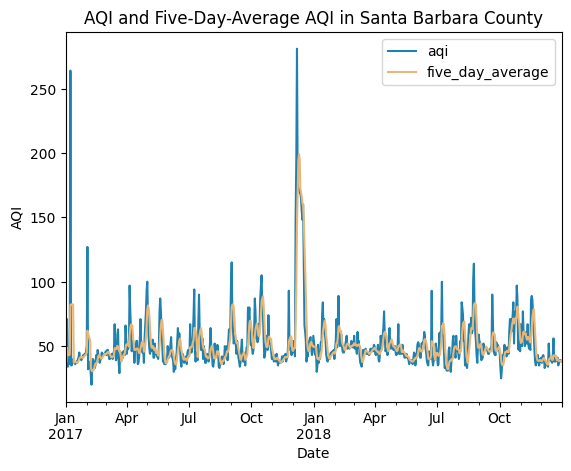

In [1]:
### ===== FINAL CODE =====

# import libraries
import pandas as pd

# read in files
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')

# data exploration not included here, as instructions say: 
# "The only ouput of this cell should be the graph you produced in the previous exercise"

# glue the files together using concatenate
aqi = pd.concat([aqi_17, aqi_18])

# clean column names: make all lower case and replace spaces with underscores
aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

# subset Santa Barbara: select rows where the county_name is santa barbara only
aqi_sb=aqi.loc[aqi.county_name=="Santa Barbara"]

# drop unecessary columns from subset: drop 'state_name', 'county_name', 'state_code' and 'county_code' columns
aqi_sb = aqi_sb.drop(columns=['state_name', 'county_name', 'state_code','county_code'])

# convert date column from string to timestamps
aqi_sb.date = pd.to_datetime(aqi_sb.date)

# set date coumn as index
aqi_sb = aqi_sb.set_index('date')

# add column with 5 day average AQI and calculate the 5 day rolling average using the "rolling" function
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

# set plot colors using dictionary
color = {'aqi':'#1e81b0',
                 'five_day_average': '#eab676'
                 }
# cleate plot
aqi_sb.plot(y=['aqi', 'five_day_average'], # list of column names
        title = 'AQI and Five-Day-Average AQI in Santa Barbara County', # update title
        xlabel='Date',
        ylabel='AQI',
        color=color # name of colors dictionary
        )